# Dados da Fórmula 1 de 1950 à 2024

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Conectando com todos os CSV
dfCircuitos = pd.read_csv("../../data/raw/DataBaseF1/circuits.csv")
dfConstrutoresResultado = pd.read_csv("../../data/raw/DataBaseF1/constructor_results.csv")
dfConstrutoresClassificacao = pd.read_csv("../../data/raw/DataBaseF1/constructor_standings.csv")
dfConstrutores = pd.read_csv("../../data/raw/DataBaseF1/constructors.csv")
dfPilotosClassificacao = pd.read_csv("../../data/raw/DataBaseF1/driver_standings.csv")
dfPilotos = pd.read_csv("../../data/raw/DataBaseF1/drivers.csv")
dfVoltas = pd.read_csv("../../data/raw/DataBaseF1/lap_times.csv")
dfPitStops = pd.read_csv("../../data/raw/DataBaseF1/pit_stops.csv")
dfQualificacao = pd.read_csv("../../data/raw/DataBaseF1/qualifying.csv")
dfCorridas = pd.read_csv("../../data/raw/DataBaseF1/races.csv")
dfResultadosCorrida = pd.read_csv("../../data/raw/DataBaseF1/results.csv")
dfTemporadas = pd.read_csv("../../data/raw/DataBaseF1/seasons.csv")
dfSprints = pd.read_csv("../../data/raw/DataBaseF1/sprint_results.csv")
dfStatus = pd.read_csv("../../data/raw/DataBaseF1/status.csv")

## Pilotos com mais vitórias na Fórmmula 1

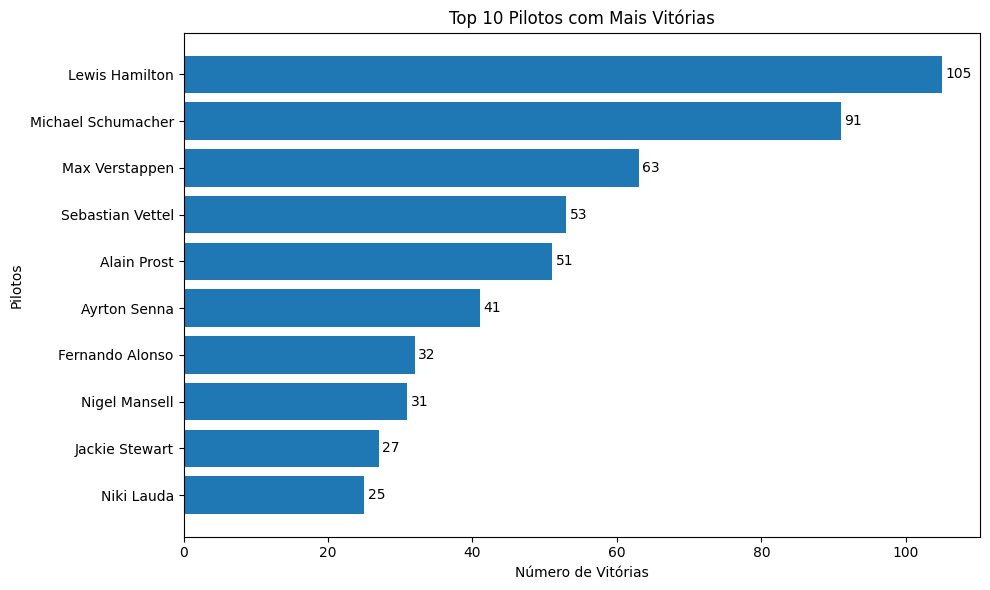

In [62]:
dfVitorias = dfResultadosCorrida[dfResultadosCorrida['positionOrder'] == 1]
dfVitorias = dfVitorias.merge(dfPilotos[['driverId', 'forename', 'surname', 'dob']], on='driverId', how='left')
dfVitorias.rename(columns={'dob': 'Data de Nascimento', 'forename': 'Nome', 'surname': 'Sobrenome'}, inplace=True)
dfVitorias = dfVitorias.groupby(['driverId', 'Nome', 'Sobrenome', 'Data de Nascimento']).size().reset_index(name='Vitórias').sort_values(by='Vitórias', ascending=False)
dfTop10 = dfVitorias.head(10).iloc[::-1]  # inverte p/ maior ficar no topo

# plot - top 10 pilotos com mais vitórias
plt.figure(figsize=(10, 6))
plt.barh(
    dfTop10['Nome'] + ' ' + dfTop10['Sobrenome'],
    dfTop10['Vitórias']
)

# Adiciona os números no final das barras
for i, v in enumerate(dfTop10['Vitórias']):
    plt.text(
        v + 0.5,  # desloca um pouco pra frente da barra
        i,        # posição na vertical
        str(v),   # texto = número de vitórias
        va='center'
    )

plt.title('Top 10 Pilotos com Mais Vitórias')
plt.xlabel('Número de Vitórias')
plt.ylabel('Pilotos')
plt.tight_layout()
plt.show()


# Construtores com mais corridas na história da F1

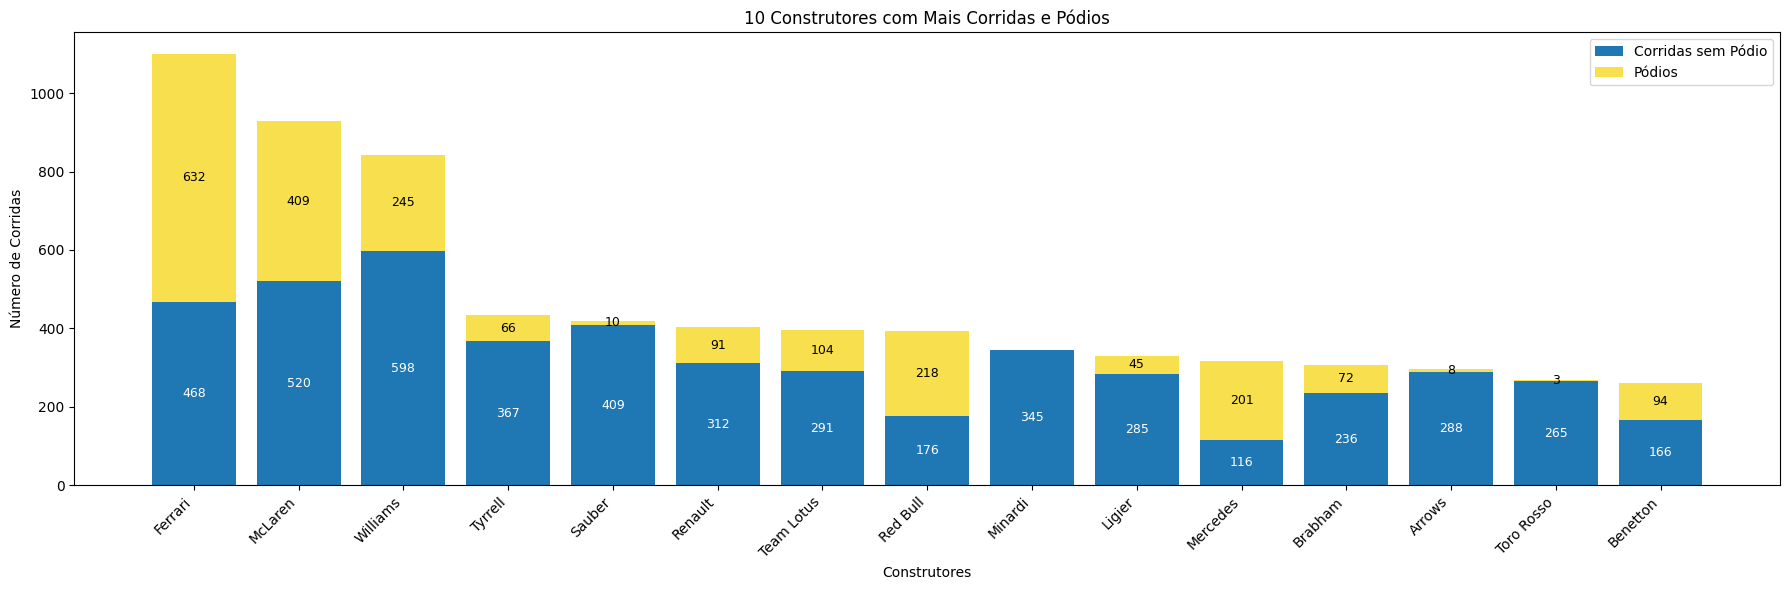

In [63]:
dfPodios = dfResultadosCorrida[dfResultadosCorrida['positionOrder'].isin([1, 2, 3])]

# Apenas 1 por equipe por corrida (mesmo que os dois carros subam ao pódio, conta uma vez só)
dfPodiosEquipe = dfPodios.drop_duplicates(subset=['constructorId', 'raceId'])
dfPodiunsCount = dfPodiosEquipe.groupby('constructorId').size().reset_index(name='Podios')

dfCorridasEquipe = dfResultadosCorrida.drop_duplicates(subset=['constructorId', 'raceId'])
dfCorridasCount = dfCorridasEquipe.groupby('constructorId').size().reset_index(name='Corridas')

dfEstatisticasConstrutores = dfCorridasCount.merge(dfPodiunsCount, on='constructorId', how='left')
dfEstatisticasConstrutores['Podios'] = dfEstatisticasConstrutores['Podios'].fillna(0).astype(int)

dfEstatisticasConstrutores = dfEstatisticasConstrutores.merge(dfConstrutores[['constructorId', 'name', 'nationality']], on='constructorId', how='left')
dfEstatisticasConstrutores = dfEstatisticasConstrutores.sort_values(by='Corridas', ascending=False)
dfEstatisticasConstrutores = dfEstatisticasConstrutores.head(15) # Alterar aqui a quantidade no gráfico

#plot 
plt.figure(figsize=(len(dfEstatisticasConstrutores) * 1.2, 6))

names = dfEstatisticasConstrutores['name'].values
sem_podio = (dfEstatisticasConstrutores['Corridas'] - dfEstatisticasConstrutores['Podios']).values
com_podio = dfEstatisticasConstrutores['Podios'].values

bar1 = plt.bar(names, sem_podio, label='Corridas sem Pódio')
bar2 = plt.bar(names, com_podio, bottom=sem_podio, label='Pódios', color="#F8DF4E")

# Adicionando rótulos nas barras
for i in range(len(names)):
    if sem_podio[i] > 0:
        plt.text(i, sem_podio[i] / 2, str(sem_podio[i]), ha='center', va='center', color="#FFFFFF", fontsize=9)
    
    if com_podio[i] > 0:
        plt.text(i, sem_podio[i] + com_podio[i] / 2, str(com_podio[i]), ha='center', va='center', color="#000000", fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.title('10 Construtores com Mais Corridas e Pódios')
plt.xlabel('Construtores')
plt.ylabel('Número de Corridas')
plt.legend()
plt.tight_layout()
plt.show()